In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from preprocess import load_data, preprocess_data
from model_utils import train_and_evaluate

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score


In [9]:
df = pd.read_csv('../data/employee_dataset_india.csv')
print("Initial Shape:", df.shape)
df.head()

Initial Shape: (973, 10)


,Job_Title,Education_Level,Years_of_Experience,Location,Company_Size,Industry,Employment_Type,Remote_Work,Certification,Salary
0,Data Scientist,Master,3,Bangalore,Large,Tech,Full-time,Yes,Yes,1800000
1,Software Engineer,Bachelor,5,Pune,Medium,Finance,Full-time,No,No,1400000
2,Data Analyst,Bachelor,2,Chennai,Small,E-commerce,Full-time,Yes,No,900000
3,Machine Learning Engineer,PhD,6,Hyderabad,Large,Tech,Full-time,Yes,Yes,2500000
4,Backend Developer,Bachelor,4,Ahmedabad,Medium,Healthcare,Full-time,No,No,1200000


In [10]:
df = df.drop_duplicates()
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [11]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

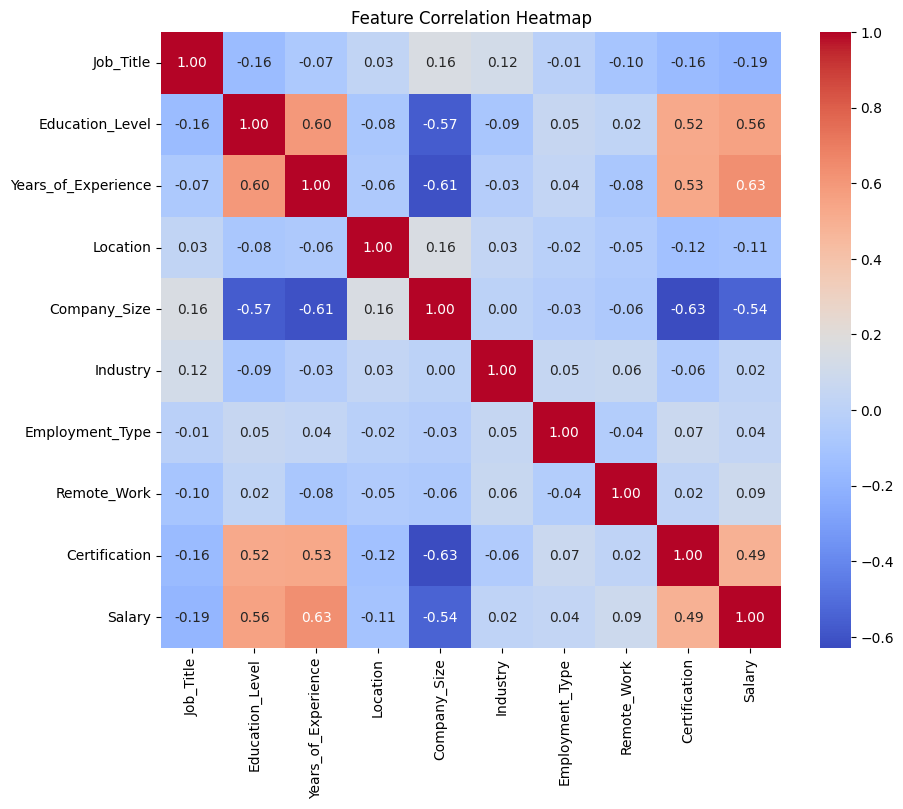

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [13]:
target_col = 'Salary'
X = df.drop(target_col, axis=1)
y = df[target_col]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR()
}

In [17]:
r2_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_scores[name] = score
    print(f"{name} R² Score: {score:.4f}")


Linear Regression R² Score: 0.5585
Random Forest R² Score: 0.5420
SVR R² Score: -0.1119


C:\Users\91709\AppData\Local\Temp\ipykernel_28048\582082738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), palette=colors)


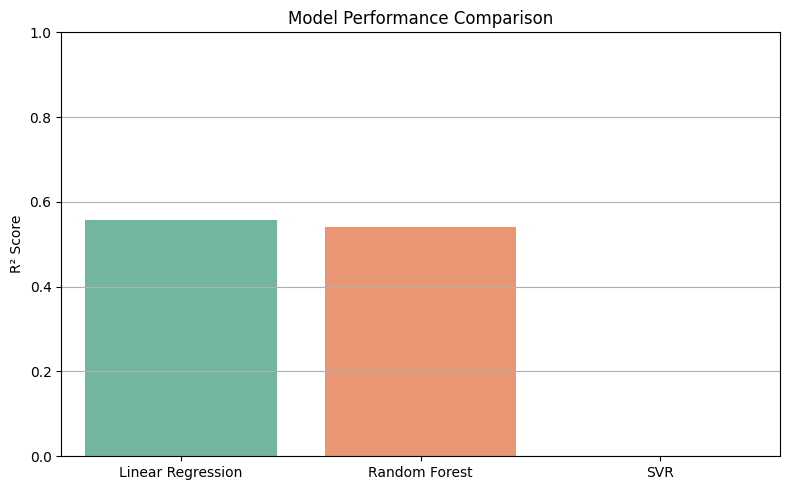

In [18]:
plt.figure(figsize=(8, 5))
colors = sns.color_palette("Set2", len(r2_scores))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), palette=colors)
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
print(df.describe())
print(df.info())
print("Missing values:\n", df.isnull().sum())


        Job_Title  Education_Level  Years_of_Experience    Location  \
count  973.000000       973.000000           973.000000  973.000000   
mean   185.774923         1.293936             4.160329   25.163412   
std    109.710701         1.570672             1.795911   14.659476   
min      0.000000         0.000000             0.000000    0.000000   
25%     92.000000         0.000000             3.000000   13.000000   
50%    182.000000         0.000000             4.000000   25.000000   
75%    280.000000         3.000000             5.000000   38.000000   
max    375.000000         4.000000            12.000000   58.000000   

       Company_Size    Industry  Employment_Type  Remote_Work  Certification  \
count    973.000000  973.000000       973.000000   973.000000     973.000000   
mean       0.803700   47.112025         1.987667     0.571429       0.612539   
std        0.747772   22.266317         0.264209     0.495126       0.487421   
min        0.000000    0.000000         

In [20]:
# Remove rows where Salary is beyond 99th percentile
upper_limit = df['Salary'].quantile(0.99)
lower_limit = df['Salary'].quantile(0.01)
df = df[(df['Salary'] <= upper_limit) & (df['Salary'] >= lower_limit)]


In [21]:
# Combine features or create ratios
df['Experience_Per_Company_Size'] = df['Years_of_Experience'] / (df['Company_Size'] + 1)


In [22]:
df = pd.get_dummies(df, drop_first=True)


In [23]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
}


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)
print("Best R² Score:", grid.best_score_)
print("Best Params:", grid.best_params_)


Best R² Score: 0.44599095617215045
Best Params: {'max_depth': 5, 'n_estimators': 200}


In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    trained_models[name] = model  # store trained model
    print(f"{name} R² Score: {score:.4f}")


Random Forest R² Score: 0.5412
Gradient Boosting R² Score: 0.4826
XGBoost R² Score: 0.4691


In [29]:
feature_names = X.columns


In [30]:
rf_model = trained_models['Random Forest']
importances = rf_model.feature_importances_

# Fix: Make sure feature_names length matches importances
if len(importances) == len(feature_names):
    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feat_imp.values, y=feat_imp.index)
    plt.title("Feature Importance - Random Forest")
    plt.xlabel("Importance Score")
    plt.show()
else:
    print("Mismatch between feature names and importances.")


Mismatch between feature names and importances.


In [31]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib

In [32]:
df = pd.read_csv('../data/employee_dataset_india.csv')


In [33]:
q_low, q_hi = df['Salary'].quantile([0.01, 0.99])
df = df[(df['Salary'] >= q_low) & (df['Salary'] <= q_hi)]

In [34]:
df['Experience_per_Location'] = df['Years_of_Experience'] / (df['Location'].nunique() + 1)

In [35]:
df_encoded = pd.get_dummies(df.drop('Salary', axis=1), drop_first=True)

In [36]:
X = df_encoded
y = df['Salary']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=300, learning_rate=0.1),
    'XGBoost': XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
}

In [40]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {'model': model, 'r2': r2, 'rmse': rmse}
    print(f"{name}:\n  R² Score: {r2:.4f}\n  RMSE: {rmse:.2f}\n")


Random Forest:
  R² Score: 0.5387
  RMSE: 431630.44

Gradient Boosting:
  R² Score: 0.5796
  RMSE: 412090.85

XGBoost:
  R² Score: 0.5394
  RMSE: 431326.65



C:\Users\91709\AppData\Local\Temp\ipykernel_28048\2172106526.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_vals, palette="viridis")
C:\Users\91709\AppData\Local\Temp\ipykernel_28048\2172106526.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=rmse_vals, palette="magma")


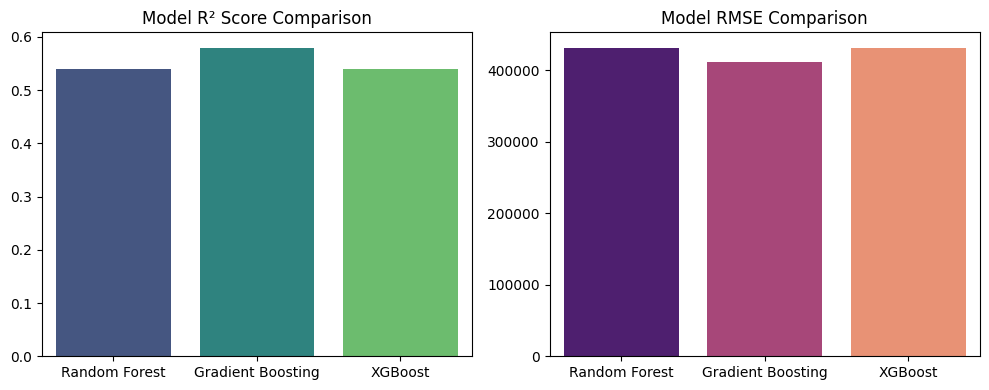

In [41]:
r2_vals = [v['r2'] for v in results.values()]
rmse_vals = [v['rmse'] for v in results.values()]
labels = list(results.keys())

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=r2_vals, palette="viridis")
plt.title("Model R² Score Comparison")

plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=rmse_vals, palette="magma")
plt.title("Model RMSE Comparison")
plt.tight_layout()
plt.show()

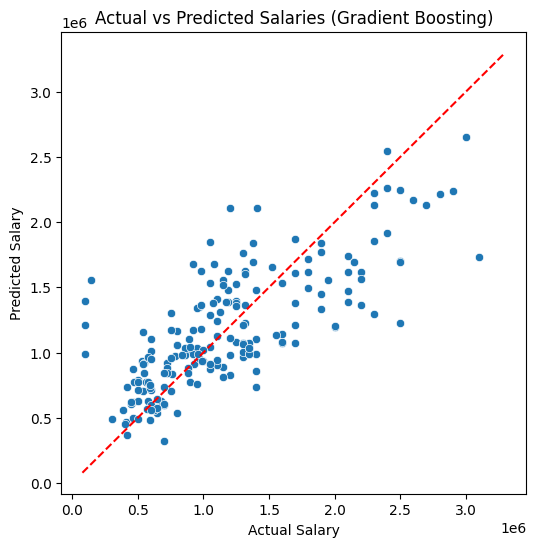

In [42]:
best_model_name = max(results, key=lambda x: results[x]['r2'])
best_model = results[best_model_name]['model']
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title(f"Actual vs Predicted Salaries ({best_model_name})")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.show()

In [43]:
joblib.dump(best_model, '../models/trained_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')
print(f"✅ Saved best model ({best_model_name}) and scaler.")

✅ Saved best model (Gradient Boosting) and scaler.


In [44]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Configuration
n = 1000

df = pd.DataFrame({
    'Job_Title': np.random.choice(['Software Engineer', 'Data Scientist', 'DevOps Engineer', 'QA Engineer'], n),
    'Education_Level': np.random.choice(['Bachelors', 'Masters', 'PhD'], n),
    'Years_of_Experience': np.random.normal(5, 3, n).clip(0, 20).round(1),
    'Location': np.random.choice(['Bangalore', 'Hyderabad', 'Pune', 'Chennai'], n),
    'Company_Size': np.random.choice(['Small', 'Medium', 'Large'], n),
    'Industry': np.random.choice(['Tech', 'Finance', 'Healthcare'], n),
    'Employment_Type': np.random.choice(['Full-time', 'Contract', 'Intern'], n),
    'Remote_Work': np.random.choice(['Yes', 'No'], n),
    'Certification': np.random.choice(['Yes', 'No'], n),
    'University_Tier': np.random.choice(['Tier 1', 'Tier 2', 'Tier 3'], n),
    'Job_Level': np.random.choice(['Junior', 'Mid', 'Senior'], n)
})

# Calculate salary
base = 300000 + df['Years_of_Experience'] * 100000
industry = df['Industry'].map({'Tech': 1.2, 'Finance': 1.1, 'Healthcare': 0.9})
job_level = df['Job_Level'].map({'Junior': 1.0, 'Mid': 1.4, 'Senior': 2.0})
education = df['Education_Level'].map({'Bachelors': 1.0, 'Masters': 1.2, 'PhD': 1.5})
tier = df['University_Tier'].map({'Tier 1': 1.3, 'Tier 2': 1.1, 'Tier 3': 1.0})
remote = df['Remote_Work'].map({'Yes': 0.95, 'No': 1.0})
cert = df['Certification'].map({'Yes': 1.1, 'No': 1.0})

df['Salary'] = (
    base * industry * job_level * education * tier * remote * cert
).round(-3)

df.to_csv('employee_dataset_india.csv', index=False)


In [45]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000

# Expanded Job Titles
job_titles = [
    'Software Engineer', 'Data Scientist', 'DevOps Engineer', 'QA Engineer', 'Product Manager',
    'UI/UX Designer', 'Mobile Developer', 'Machine Learning Engineer', 'Security Analyst',
    'Cloud Architect', 'Business Analyst', 'Technical Writer', 'Blockchain Developer',
    'Frontend Developer', 'Backend Developer', 'Database Administrator'
]

# Expanded Locations
locations = [
    'Bangalore', 'Hyderabad', 'Pune', 'Chennai', 'Delhi', 'Mumbai', 'Kolkata',
    'Ahmedabad', 'Jaipur', 'Noida', 'Gurgaon', 'Coimbatore', 'Indore', 'Nagpur', 'Thiruvananthapuram'
]

df = pd.DataFrame({
    'Job_Title': np.random.choice(job_titles, n),
    'Education_Level': np.random.choice(['Bachelors', 'Masters', 'PhD'], n),
    'Years_of_Experience': np.random.normal(5, 3, n).clip(0, 20).round(1),
    'Location': np.random.choice(locations, n),
    'Company_Size': np.random.choice(['Small', 'Medium', 'Large'], n),
    'Industry': np.random.choice(['Tech', 'Finance', 'Healthcare'], n),
    'Employment_Type': np.random.choice(['Full-time', 'Contract', 'Intern'], n),
    'Remote_Work': np.random.choice(['Yes', 'No'], n),
    'Certification': np.random.choice(['Yes', 'No'], n),
    'University_Tier': np.random.choice(['Tier 1', 'Tier 2', 'Tier 3'], n),
    'Job_Level': np.random.choice(['Junior', 'Mid', 'Senior'], n)
})

# Calculate salary
base = 300000 + df['Years_of_Experience'] * 100000
industry = df['Industry'].map({'Tech': 1.2, 'Finance': 1.1, 'Healthcare': 0.9})
job_level = df['Job_Level'].map({'Junior': 1.0, 'Mid': 1.4, 'Senior': 2.0})
education = df['Education_Level'].map({'Bachelors': 1.0, 'Masters': 1.2, 'PhD': 1.5})
tier = df['University_Tier'].map({'Tier 1': 1.3, 'Tier 2': 1.1, 'Tier 3': 1.0})
remote = df['Remote_Work'].map({'Yes': 0.95, 'No': 1.0})
cert = df['Certification'].map({'Yes': 1.1, 'No': 1.0})

df['Salary'] = (
    base * industry * job_level * education * tier * remote * cert
).round(-3)

df.to_csv('employee_dataset_india.csv', index=False)
